# Prepare: libraries, get CSV, one-hot encoding, scaling

In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# import and read cleaned_autism_screening.csv
clean_df = pd.read_csv("cleaned_autism_screening.csv")

# convert "yes" and "no" values into 1 and 0
clean_df['Class/ASD']=clean_df['Class/ASD'].str.lower()
for col in ('fam_with_autism', 'used_app_before', 'Class/ASD'):
    clean_df[col]=clean_df[col].map({'no': 0, 'yes': 1})

# Applying one-hot encoding
encode_clean_df = pd.get_dummies(clean_df, dtype=int)

# split data
X = encode_clean_df.drop("Class/ASD", axis=1)
Y = encode_clean_df['Class/ASD']

X_train,X_test,Y_train,Y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.25, random_state=1)

# feature scaling
scaler.fit(X_train)                     
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Ensemble Learning: VotingClassifier

TP:  105 
FP:  3 
FN:  2 
TN:  43
VotingClassifier 
Ensemble accuracy:  0.9673 
Ensemble precision:  0.9348 
Ensemble recall:  0.9556 
Ensemble specificity:  0.9348 
Ensemble misclassification:  0.0327
Ensemble AUC:  0.9639


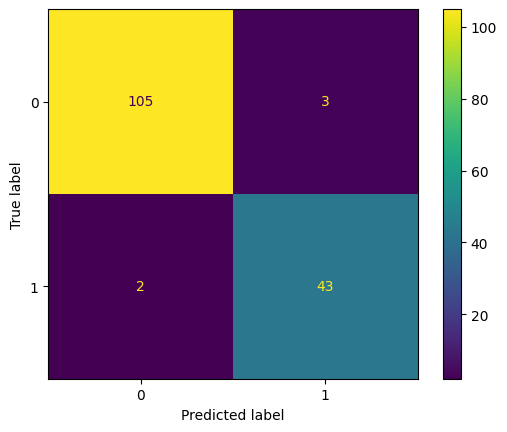

In [2]:
# Voting-based Ensemble for Classification using various methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# create the sub models using LogisticRegression, DecisionTree, and SupportVector
estimators = []
model1 = LogisticRegression(random_state=7)  # Logistic Regression Classifier
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(random_state=7) # Decision Tree Classifier
estimators.append(('cart', model2))
model3 = SVC(random_state=7) #Support Vector Classifier
estimators.append(('svc', model3))

# create the ensemble model
es_Vote = VotingClassifier(estimators)
es_Vote.fit(X_train, Y_train)
y_predict_en = es_Vote.predict(X_test)

# Model performance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Confusion Matrix
cm_en=confusion_matrix(Y_test, y_predict_en, labels=es_Vote.classes_)
en_TP = cm_en[0][0]
en_FP = cm_en[0][1]
en_FN = cm_en[1][0]
en_TN = cm_en[1][1]

print("TP: ", en_TP, '\nFP: ', en_FP, '\nFN: ', en_FN, '\nTN: ', en_TN)
print(es_Vote.__class__.__name__, 
      '\nEnsemble accuracy: ', round(accuracy_score(Y_test, y_predict_en), 4),
      '\nEnsemble precision: ', round(precision_score(Y_test, y_predict_en), 4), #TP/(TP+FP),
      '\nEnsemble recall: ', round(recall_score(Y_test, y_predict_en), 4) , #TP/(TP+FN),
      '\nEnsemble specificity: ', round((en_TN/(en_TN + en_FP)), 4),
      '\nEnsemble misclassification: ', round(1-accuracy_score(Y_test, y_predict_en), 4)
      )

en_matrix = ConfusionMatrixDisplay(
    confusion_matrix=cm_en, 
    display_labels=es_Vote.classes_)
en_matrix.plot()

# ROC - AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

en_auc = roc_auc_score(Y_test, y_predict_en)
print("Ensemble AUC: ", round(en_auc, 4))

# KNN

1 0.7581699346405228
2 0.8169934640522876
3 0.8235294117647058
4 0.8300653594771242
5 0.8562091503267973
6 0.8562091503267973
7 0.8627450980392157
8 0.8758169934640523
9 0.8888888888888888
10 0.8954248366013072
11 0.8758169934640523
12 0.8823529411764706
13 0.8954248366013072
14 0.8954248366013072
15 0.9084967320261438
16 0.9150326797385621
17 0.9150326797385621
18 0.8954248366013072
19 0.9150326797385621
20 0.9150326797385621
21 0.9215686274509803
22 0.9150326797385621
23 0.9215686274509803
24 0.934640522875817
25 0.9150326797385621
26 0.9411764705882353
27 0.9281045751633987
28 0.934640522875817
29 0.9281045751633987
30 0.9281045751633987
31 0.9150326797385621
32 0.9281045751633987
33 0.934640522875817
34 0.9477124183006536
35 0.9477124183006536
36 0.9411764705882353
37 0.934640522875817
38 0.934640522875817
39 0.9411764705882353
40 0.934640522875817
41 0.9281045751633987
42 0.934640522875817
43 0.934640522875817
44 0.9281045751633987
45 0.9411764705882353
46 0.934640522875817
47 0.9

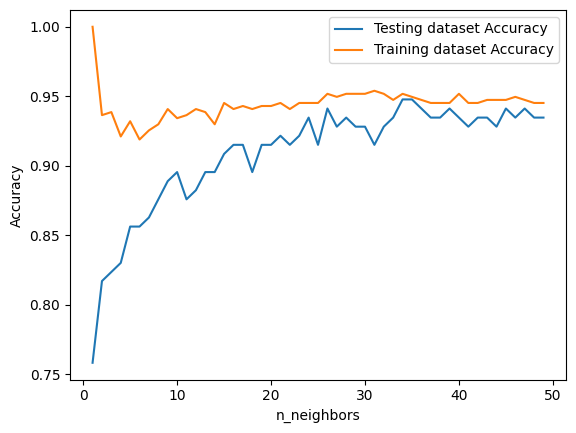

TP:  105 
FP:  3 
FN:  5 
TN:  40
KNeighborsClassifier 
KNN accuracy:  0.9477 
KNN precision:  0.9302 
KNN recall:  0.8889 
KNN specificity:  0.9302 
KNN misclassification:  0.0523
KNN AUC:  0.9306


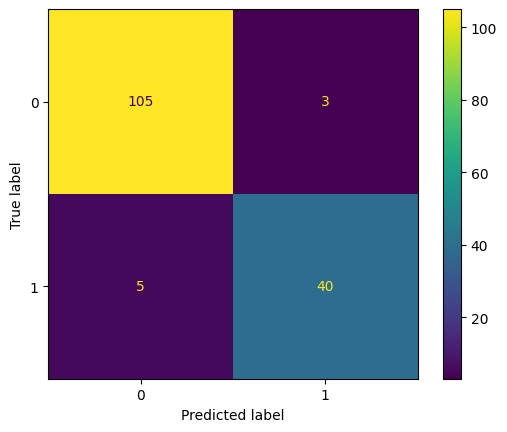

In [14]:
# Import necessary modules 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Trial - find out which k-value is the best
neighbors = np.arange(1, 50) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, Y_train) 
    test_accuracy[i] = knn.score(X_test, Y_test)
    print(k, test_accuracy[i])
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

# use k = 35
knn = KNeighborsClassifier(n_neighbors=35) 
knn.fit(X_train, Y_train) 

y_predict_knn = knn.predict(X_test)
knn.score(X_test, Y_test)

cm_knn = confusion_matrix(Y_test, y_predict_knn)
knn_TP = cm_knn[0][0]
knn_FP = cm_knn[0][1]
knn_FN = cm_knn[1][0]
knn_TN = cm_knn[1][1]

print("TP: ", knn_TP, '\nFP: ', knn_FP, '\nFN: ', knn_FN, '\nTN: ', knn_TN)
print(knn.__class__.__name__, 
      '\nKNN accuracy: ', round(accuracy_score(Y_test, y_predict_knn), 4),
      '\nKNN precision: ',round(precision_score(Y_test, y_predict_knn),4), # TP/(TP+FP),
      '\nKNN recall: ', round(recall_score(Y_test, y_predict_knn), 4), # TP/(TP+FN),
      '\nKNN specificity: ', round(knn_TN/(knn_TN+knn_FP), 4),
      '\nKNN misclassification: ', round(1-accuracy_score(Y_test, y_predict_knn), 4)
      )

knn_matrix = ConfusionMatrixDisplay(
    confusion_matrix=cm_knn, 
    display_labels=knn.classes_)
knn_matrix.plot()

# ROC - AUC
from sklearn.metrics import roc_curve, roc_auc_score

knn_auc = roc_auc_score(Y_test, y_predict_knn)
print("KNN AUC: ", round(knn_auc, 4))


# Random Forest Classifier

TP:  108 
FP:  0 
FN:  0 
TN:  45
RandomForestClassifier 
Random Forest accuracy:  1.0 
Random Forest precision:  1.0 
Random Forest recall:  1.0 
Random Forest specificity:  1.0 
Random Forest misclassification:  0.0
Random Forest AUC:  1.0


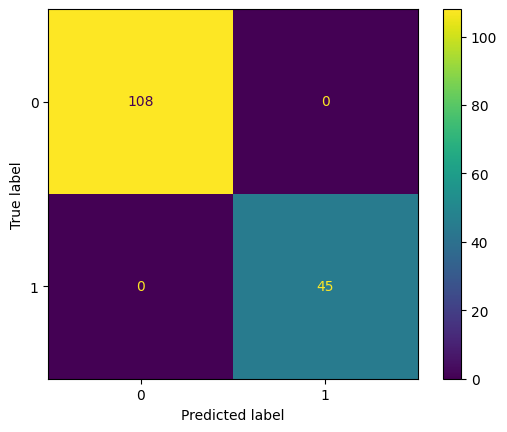

In [7]:
# Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

y_predict_rf = rf.predict(X_test)

cm_rf = confusion_matrix(Y_test, y_predict_rf)
rf_TP = cm_rf[0][0]
rf_FP = cm_rf[0][1]
rf_FN = cm_rf[1][0]
rf_TN = cm_rf[1][1]

print("TP: ", rf_TP, '\nFP: ', rf_FP, '\nFN: ', rf_FN, '\nTN: ', rf_TN)
print(rf.__class__.__name__, 
      '\nRandom Forest accuracy: ', round(accuracy_score(Y_test, y_predict_rf), 4),
      '\nRandom Forest precision: ',round(precision_score(Y_test, y_predict_rf),4), # TP/(TP+FP),
      '\nRandom Forest recall: ', round(recall_score(Y_test, y_predict_rf), 4), # TP/(TP+FN),
      '\nRandom Forest specificity: ', round(rf_TN/(rf_TN+rf_FP), 4),
      '\nRandom Forest misclassification: ', round(1-accuracy_score(Y_test, y_predict_rf), 4)
      )

rf_matrix = ConfusionMatrixDisplay(
      confusion_matrix=cm_rf, 
      display_labels=rf.classes_)
rf_matrix.plot()

# ROC - AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rf_auc = roc_auc_score(Y_test, y_predict_rf)
print("Random Forest AUC: ", round(rf_auc, 4))

# Logistic Regression

intercept: [-3.2002]
                    Attribute Coefficient
13                  sum_score        1.72
5                    A6_Score        1.13
8                    A9_Score        1.12
6                    A7_Score        1.11
4                    A5_Score        1.04
..                        ...         ...
53       country_of_res_India       -0.03
37     country_of_res_Bolivia       -0.02
35  country_of_res_Bangladesh       -0.02
30     country_of_res_Armenia       -0.01
60      country_of_res_Mexico        -0.0

[92 rows x 2 columns]
TP:  101 
FP:  7 
FN:  3 
TN:  42
LogisticRegression 
Logistic Regression accuracy:  0.9346 
Logistic Regression precision:  0.8571 
Logistic Regression recall:  0.9333 
Logistic Regression specificity:  0.8571 
Logistic Regression misclassification:  0.0654
Logistic Regression AUC:  0.9343


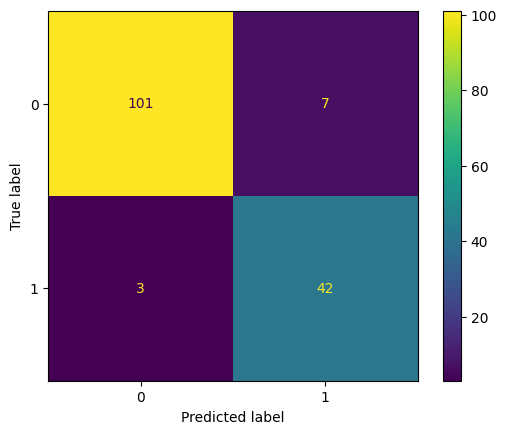

In [23]:
import numpy as np
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='liblinear', random_state=50, max_iter=300)
lg.fit(X_train, Y_train)

# obtain the model intercept and coefficient of each input attribute
print(f"intercept: {np.round(lg.intercept_,4)}")
fieldList = np.array(list(X)).reshape(-1,1)
coeffs = np.reshape(np.round(lg.coef_,2),(-1,1))
coeffs=np.concatenate((fieldList,coeffs),axis=1)
lh_df = pd.DataFrame(coeffs,columns=['Attribute','Coefficient'])
print(lh_df.sort_values('Coefficient', ascending=False))

# fit the model to compare predicted and actual target output values
y_predict_lg = lg.predict(X_test)      

# Model perfomance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

cm_lg = confusion_matrix(Y_test, y_predict_lg)
lg_TP = cm_lg[0][0]
lg_FP = cm_lg[0][1]
lg_FN = cm_lg[1][0]
lg_TN = cm_lg[1][1]

print("TP: ", lg_TP, '\nFP: ', lg_FP, '\nFN: ', lg_FN, '\nTN: ', lg_TN)
print(lg.__class__.__name__, 
      '\nLogistic Regression accuracy: ', round(accuracy_score(Y_test, y_predict_lg), 4),
      '\nLogistic Regression precision: ',round(precision_score(Y_test, y_predict_lg),4), # TP/(TP+FP),
      '\nLogistic Regression recall: ', round(recall_score(Y_test, y_predict_lg), 4), # TP/(TP+FN),
      '\nLogistic Regression specificity: ', round(lg_TN/(lg_TN+lg_FP), 4),
      '\nLogistic Regression misclassification: ', round(1-accuracy_score(Y_test, y_predict_lg), 4)
      )

lg_matrix = ConfusionMatrixDisplay(
      confusion_matrix=cm_lg, 
      display_labels=lg.classes_)
lg_matrix.plot()

# ROC - AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lg_auc = roc_auc_score(Y_test, y_predict_lg)
print("Logistic Regression AUC: ", round(lg_auc, 4))

# ROC

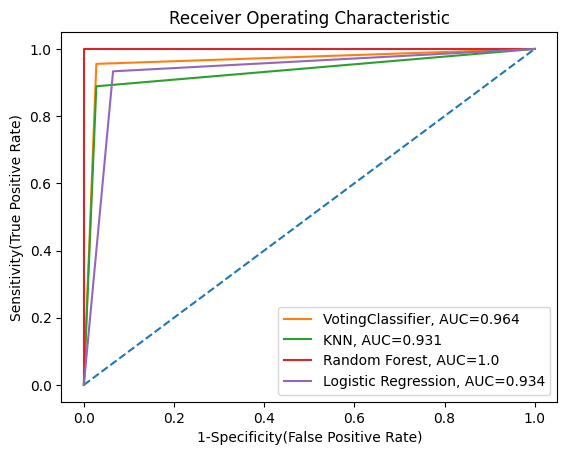

In [6]:
# apply models for predictions
y_predict_en
y_predict_knn
y_predict_rf
y_predict_lg

# derive ROC AUC scores of each model
en_auc
knn_auc
rf_auc
lg_auc

# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit Ensemble Learning - VotingClassifier and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_en)
plt.plot(fpr,tpr,label="VotingClassifier, AUC="+str(round(en_auc,3)))

#fit KNN model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_knn)
plt.plot(fpr,tpr,label="KNN, AUC="+str(round(knn_auc,3)))

#fit Random Forest model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_rf)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(round(rf_auc,3)))

#fit Logistic Regression model and plot ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_predict_lg)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(round(lg_auc,3)))

#add legend information
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()